<a href="https://colab.research.google.com/github/Emillka/Data-Science-ML/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Load dataset
df = pd.read_csv("imdb_top_1000.csv")
print(df.head())
print(df.info())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [20]:
# Data preprocessing
df = df[['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating']].copy()  # Tworzymy kopię, aby uniknąć SettingWithCopyWarning
df.dropna(inplace=True)

# Converse to int
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Filter date
df = df[df['Released_Year'] > 1900]


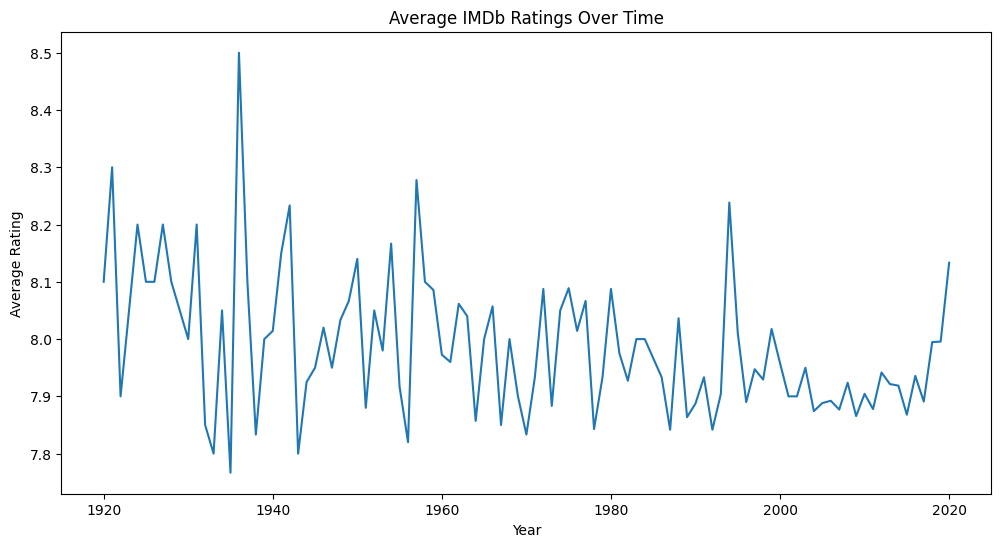

In [21]:
# Plot rating trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index(), x='Released_Year', y='IMDB_Rating')
plt.title("Average IMDb Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

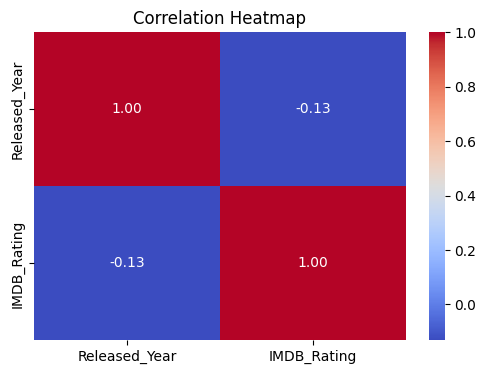

In [22]:
# Correlation heatmap
# Numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



<ipython-input-23-2ee313cafd37>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


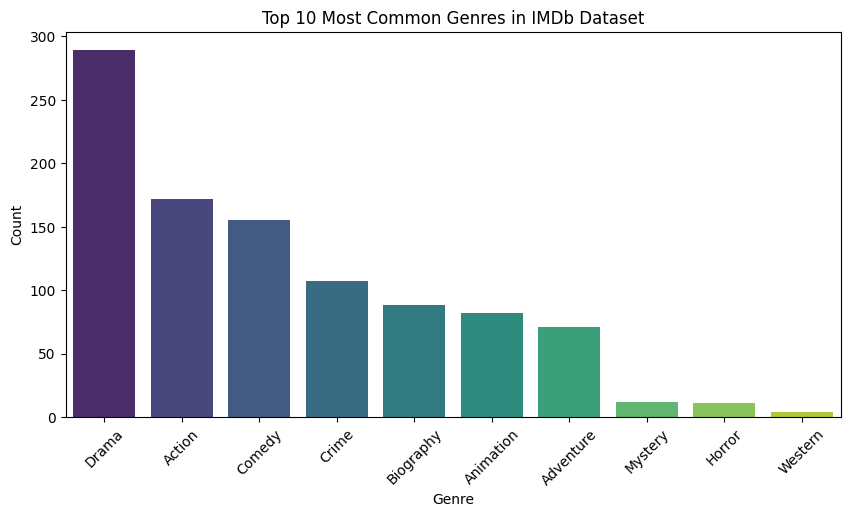

In [23]:
# Genre analysis
df['Genre'] = df['Genre'].str.split(',').str[0]
genre_counts = df['Genre'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Top 10 Most Common Genres in IMDb Dataset")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [24]:
# Display processed dataset preview
print(df.head())


               Series_Title  Released_Year   Genre  IMDB_Rating
0  The Shawshank Redemption         1994.0   Drama          9.3
1             The Godfather         1972.0   Crime          9.2
2           The Dark Knight         2008.0  Action          9.0
3    The Godfather: Part II         1974.0   Crime          9.0
4              12 Angry Men         1957.0   Crime          9.0


<Figure size 1200x800 with 0 Axes>

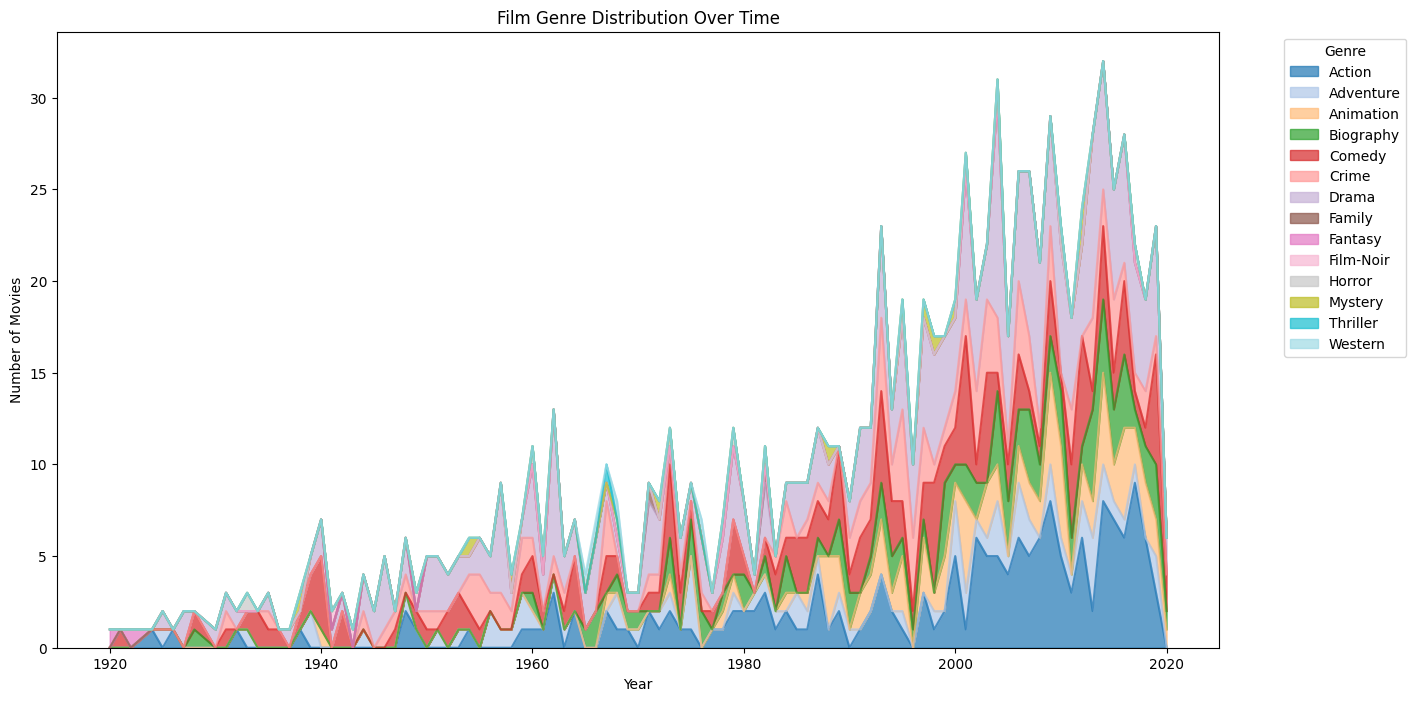

In [25]:
# Year vs Genre distribution
df['Released_Year'] = df['Released_Year'].astype(int)
genre_year = df.groupby(['Released_Year', 'Genre']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
genre_year.plot(kind='area', stacked=True, figsize=(15, 8), cmap='tab20', alpha=0.7)
plt.title("Film Genre Distribution Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


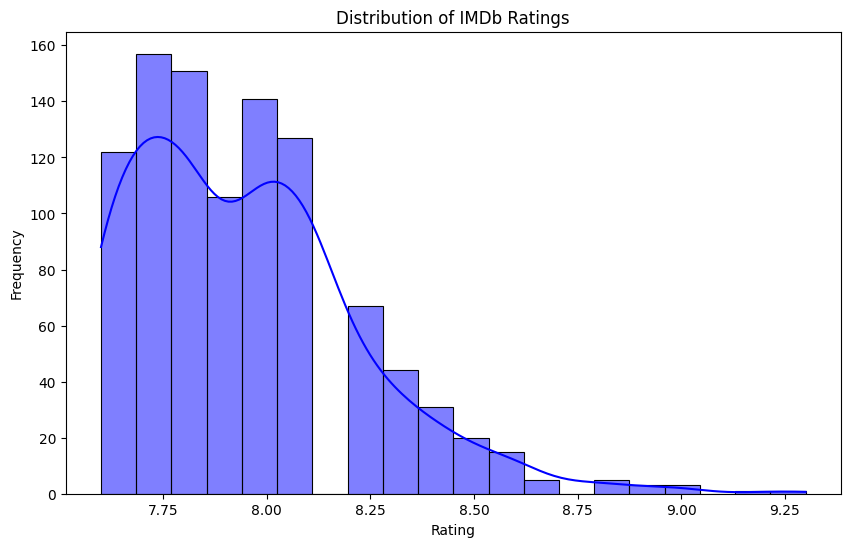

In [26]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='blue', linewidth=0.8)
plt.title("Distribution of IMDb Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


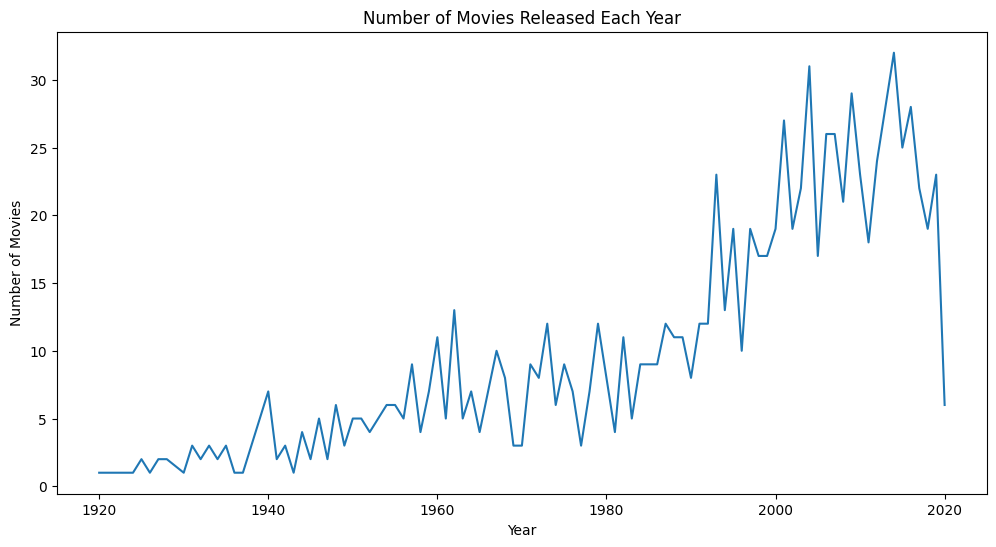

In [27]:
# Number of movies per year
movies_per_year = df.groupby('Released_Year').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title("Number of Movies Released Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()


<ipython-input-28-1af1984ca2de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, palette="Blues_d")


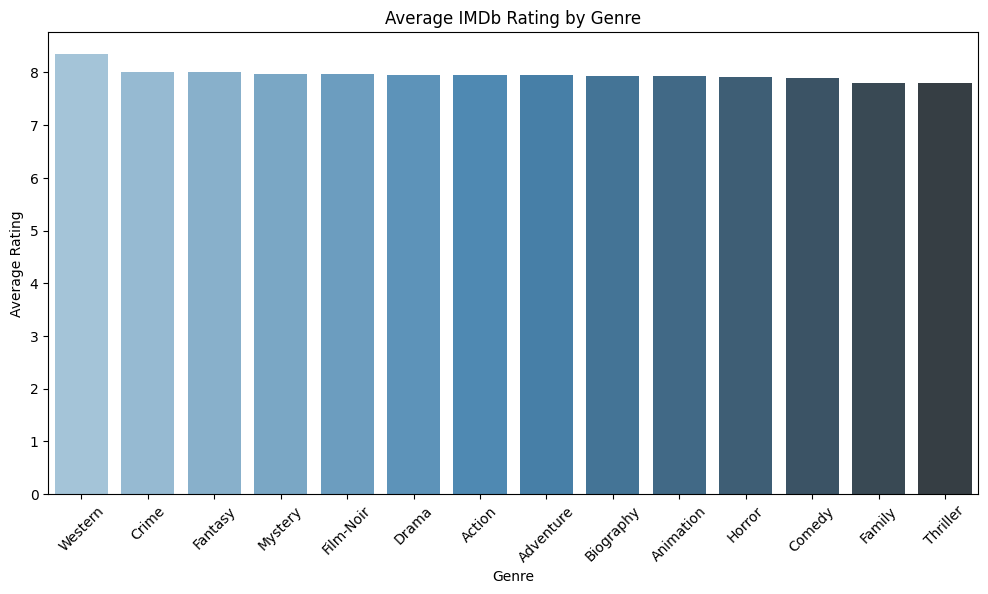

In [28]:
# Average rating by genre
avg_rating_by_genre = df.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, palette="Blues_d")
plt.title("Average IMDb Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


<ipython-input-33-325d679a3b28>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Director', y='Gross', palette="coolwarm")


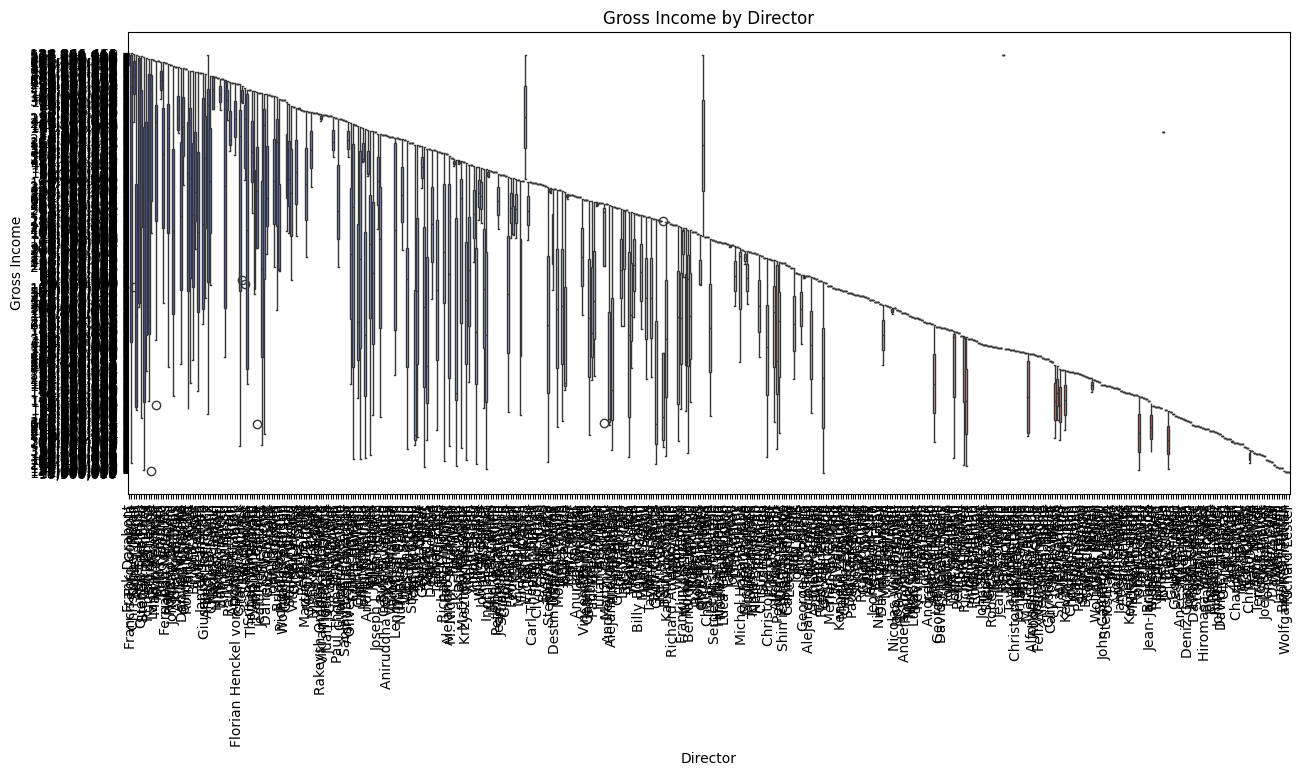

In [33]:
# Analysis of Gross vs Directors

# Load dataset
df = pd.read_csv("imdb_top_1000.csv")


df_cleaned = df.dropna(subset=['Gross', 'Director'])

# Plotting Gross vs Director
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_cleaned, x='Director', y='Gross', palette="coolwarm")
plt.title("Gross Income by Director")
plt.xticks(rotation=90)
plt.xlabel("Director")
plt.ylabel("Gross Income")
plt.show()
